In [1]:
import pandas as pd


In [2]:
leads = pd.read_csv("Leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Cleaning

In [4]:
# checking for missing values
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [5]:
leads.shape

(9240, 37)

In [6]:
# if there is column having greater than 3000 missing values, then drop this columns

for col in leads.columns:
  if leads[col].isnull().sum() > 3000:
    leads.drop(col, axis=1, inplace=True)



In [7]:
leads.shape

(9240, 31)

In [8]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
leads.drop(['City'],axis=1,inplace=True)

In [10]:
leads.drop(['Country'],axis=1,inplace=True)

In [11]:
# checking the % of missing values
round(leads.isna().sum() / leads.shape[0] * 100)


Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [12]:
# i want to get the value counts for each categorical columns


In [13]:
leads['Newspaper'].astype("category").value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [14]:
for column in leads:
  print(leads[column].astype("category").value_counts())
  print("---------------------------------------------------------------")  # for sepreting different diferent columns

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: 

In [15]:
# in the above result have level = " Select" that means the student not selected option fot that perticular coumn. so we have to treat them as null values.
# hence we want to calculate the value count for level select in all the columns that is present



In [16]:
leads["Lead Profile"].astype("category").value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
leads["Specialization"].astype("category").value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
leads["How did you hear about X Education"].astype("category").value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
# clearly the levels = "select" has a lot of rows which have the values select which is of no use of analysis, so is best we drop this 2 columns

In [20]:
leads.drop(["Lead Profile","How did you hear about X Education"],axis=1,inplace=True)

In [21]:
leads.drop(["Do Not Call", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations",
            "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content",
            "I agree to pay the amount through cheque"], axis=1, inplace=True) 

In [22]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [23]:
leads.drop("What matters most to you in choosing a course", axis=1, inplace=True) 

In [24]:
leads.isna().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [25]:
leads.shape

(9240, 14)

In [26]:
# im droping the rows having null values instead of droping the whole columns

In [27]:
leads = leads[~pd.isnull(leads["What is your current occupation"])]

In [28]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [29]:
leads = leads[~pd.isnull(leads["TotalVisits"])]

In [30]:
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [31]:
leads = leads[~pd.isnull(leads["Lead Source"])]

In [32]:
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [33]:
leads = leads[~pd.isnull(leads["Specialization"])]

In [34]:
leads.isnull().sum()


Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [35]:
leads.shape[0] # Actual rows we have

6373

In [36]:
leads.shape[0] / 9240 # how many rows i have retain

0.6897186147186147

In [37]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [38]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [39]:
leads.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

In [40]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [41]:
# features and target should not have null values
# Features should not have Strings
# i want to feach only no numeric columns
leads.select_dtypes(include='object')

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,Select,Unemployed,No,Modified
...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,SMS Sent,Business Administration,Unemployed,No,Modified
9235,Landing Page Submission,Direct Traffic,Yes,Email Marked Spam,IT Projects Management,Unemployed,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,SMS Sent,Media and Advertising,Unemployed,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,SMS Sent,Business Administration,Unemployed,Yes,SMS Sent


In [42]:
leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [43]:
temp=leads.loc[:,leads.dtypes=="object"] # another way to featch the non-Numeric columns i.e.categorical columns

In [44]:
temp.dtypes

Lead Origin                               object
Lead Source                               object
Do Not Email                              object
Last Activity                             object
Specialization                            object
What is your current occupation           object
A free copy of Mastering The Interview    object
Last Notable Activity                     object
dtype: object

In [45]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
# i have stings column, how to converted into numeric, there are two methods:
# get dummies and one hot encoding, which one is best, in one hot we keep all the things and in dummies we remove. so we use dummy

In [47]:
dummy=pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

In [48]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
# how to concate both the dataFrame orignal and created dummy
leads = pd.concat([leads, dummy], axis=1)

In [50]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,...,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [51]:
# so there are strings columns in dataframe while i converted to dummies , then i drop those columns

In [52]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [53]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [54]:
(leads.dtypes=='object').sum()

0

In [55]:
X = leads.drop(["Converted"], axis=1) # Feature Matrix

In [56]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [57]:
y = leads["Converted"] # Target 

# Splitting the data training set and Test set

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)

# Applying features scalinng

In [60]:
# we dont have to apply feature scaling on dummy columns cause its already in the range(3,-3)

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [64]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9192,0.163636,0.126320,0.054545,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3516,0.090909,0.046655,0.045455,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1888,0.109091,0.135123,0.109091,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
90,0.054545,0.094190,0.054545,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1327,0.036364,0.031250,0.036364,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


# Fitting the Model

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logreg = LogisticRegression()

In [67]:
from sklearn.feature_selection import RFE

In [68]:
rfe = RFE(logreg,15)

In [69]:
rfe = rfe.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [70]:
# just to have a look what features have been selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 25),
 ('Lead Source_WeLearn', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_testone', False, 26),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 19),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link C

In [71]:
# i want to featch the columns its print True
col = X_train.columns[rfe.support_]

In [72]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Specialization_Select',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [73]:
X_train = X_train[col]

In [74]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [75]:
X_train_sm = sm.add_constant(X_train)

In [76]:
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

In [77]:
res = logm2.fit()

In [78]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.4
Date:                Tue, 23 Feb 2021   Deviance:                       4072.9
Time:                        06:11:30   Pearson chi2:                 4.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0458      0.159     -6.595      0.000      -1.357      -0.735
TotalVisits                                              2.3132      0.655      3.534      0.000       1.030       3.596
Total Time Spent on Website                              4.2717      0.187     22.901      0.000       3.906       4.637
Lead Origin_Landing Page Submission                     -0.9801      0.137     -7.164      0.000      -1.248      -0.712
Lead Origin_Lead Add Form                                3.0699      0.239     12.844      0.000       2.601       3.538
Lead Source_Olark Chat                                   1.2830      0.147      8.747      0.000       0.996       1.570
Lead Source_Welingak Website                             3.2479      1.032      3.147      0.002       1.225       5.271
Do Not Email_Yes                                        -1.2394      0.192     -6.442      0.000      -1.616      -0.862
Last Activity_Had a Phone Conversation                   1.9501      0.912      2.139      0.032       0.163       3.737
Last Activity_SMS Sent                                   1.0618      0.085     12.486      0.000       0.895       1.228
Specialization_Select                                   -0.9812      0.134     -7.325      0.000      -1.244      -0.719
What is your current occupation_Housewife               23.2117   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
What is your current occupation_Working Professional     2.2363      0.190     11.795      0.000       1.865       2.608
Last Notable Activity_Modified                          -0.8950      0.092     -9.728      0.000      -1.075      -0.715
Last Notable Activity_Olark Chat Conversation           -1.3317      0.460     -2.895      0.004      -2.233      -0.430
Last Notable Activity_Unreachable                        2.6890      1.089      2.469      0.014       0.554       4.824
========================================================================================================================
"""

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]  #List comprehencing 
vif["VIF"] = round(vif["VIF"])
vif = vif.sort_values(by="VIF", ascending=False)          # vif in the range(1-5)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [81]:
X_train.drop("What is your current occupation_Housewife",axis=1,inplace=True)

In [82]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.8
Date:                Tue, 23 Feb 2021   Deviance:                       4085.6
Time:                        06:11:30   Pearson chi2:                 4.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0353      0.158     -6.540      0.000      -1.346      -0.725
TotalVisits                                              2.2630      0.654      3.458      0.001       0.980       3.546
Total Time Spent on Website                              4.2645      0.186     22.896      0.000       3.899       4.630
Lead Origin_Landing Page Submission                     -0.9737      0.137     -7.131      0.000      -1.241      -0.706
Lead Origin_Lead Add Form                                3.0680      0.239     12.848      0.000       2.600       3.536
Lead Source_Olark Chat                                   1.2766      0.147      8.713      0.000       0.989       1.564
Lead Source_Welingak Website                             3.2448      1.032      3.144      0.002       1.222       5.268
Do Not Email_Yes                                        -1.2436      0.192     -6.470      0.000      -1.620      -0.867
Last Activity_Had a Phone Conversation                   1.9416      0.911      2.131      0.033       0.155       3.728
Last Activity_SMS Sent                                   1.0540      0.085     12.410      0.000       0.888       1.220
Specialization_Select                                   -0.9845      0.134     -7.360      0.000      -1.247      -0.722
What is your current occupation_Working Professional     2.2283      0.189     11.762      0.000       1.857       2.600
Last Notable Activity_Modified                          -0.8902      0.092     -9.701      0.000      -1.070      -0.710
Last Notable Activity_Olark Chat Conversation           -1.3326      0.460     -2.898      0.004      -2.234      -0.431
Last Notable Activity_Unreachable                        2.6804      1.089      2.462      0.014       0.546       4.815
========================================================================================================================
"""

In [83]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]  #List comprehencing 
vif["VIF"] = round(vif["VIF"])
vif = vif.sort_values(by="VIF", ascending=False)          # vif in the range(1-5)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [84]:
X_train.drop("Last Notable Activity_Unreachable",axis=1,inplace=True)

In [85]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.8
Date:                Tue, 23 Feb 2021   Deviance:                       4095.6
Time:                        06:11:30   Pearson chi2:                 4.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9981      0.157     -6.338      0.000      -1.307      -0.689
TotalVisits                                              2.2430      0.654      3.429      0.001       0.961       3.525
Total Time Spent on Website                              4.2526      0.186     22.880      0.000       3.888       4.617
Lead Origin_Landing Page Submission                     -0.9922      0.136     -7.290      0.000      -1.259      -0.725
Lead Origin_Lead Add Form                                3.0507      0.239     12.791      0.000       2.583       3.518
Lead Source_Olark Chat                                   1.2575      0.146      8.604      0.000       0.971       1.544
Lead Source_Welingak Website                             3.2482      1.032      3.148      0.002       1.226       5.271
Do Not Email_Yes                                        -1.2483      0.192     -6.497      0.000      -1.625      -0.872
Last Activity_Had a Phone Conversation                   1.9335      0.912      2.121      0.034       0.147       3.720
Last Activity_SMS Sent                                   1.0417      0.085     12.287      0.000       0.876       1.208
Specialization_Select                                   -0.9971      0.134     -7.468      0.000      -1.259      -0.735
What is your current occupation_Working Professional     2.2268      0.189     11.763      0.000       1.856       2.598
Last Notable Activity_Modified                          -0.9026      0.092     -9.849      0.000      -1.082      -0.723
Last Notable Activity_Olark Chat Conversation           -1.3437      0.460     -2.924      0.003      -2.244      -0.443
========================================================================================================================
"""

In [86]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]  #List comprehencing 
vif["VIF"] = round(vif["VIF"])
vif = vif.sort_values(by="VIF", ascending=False)          # vif in the range(1-5)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [87]:
X_train.drop("Last Activity_Had a Phone Conversation",axis=1,inplace=True)

In [88]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.4
Date:                Tue, 23 Feb 2021   Deviance:                       4100.8
Time:                        06:11:30   Pearson chi2:                 4.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9909      0.157     -6.305      0.000      -1.299      -0.683
TotalVisits                                              2.2559      0.654      3.450      0.001       0.974       3.537
Total Time Spent on Website                              4.2537      0.186     22.906      0.000       3.890       4.618
Lead Origin_Landing Page Submission                     -0.9984      0.136     -7.347      0.000      -1.265      -0.732
Lead Origin_Lead Add Form                                3.0498      0.238     12.795      0.000       2.583       3.517
Lead Source_Olark Chat                                   1.2480      0.146      8.553      0.000       0.962       1.534
Lead Source_Welingak Website                             3.2399      1.032      3.140      0.002       1.217       5.263
Do Not Email_Yes                                        -1.2522      0.192     -6.517      0.000      -1.629      -0.876
Last Activity_SMS Sent                                   1.0371      0.085     12.238      0.000       0.871       1.203
Specialization_Select                                   -0.9957      0.133     -7.469      0.000      -1.257      -0.734
What is your current occupation_Working Professional     2.2343      0.189     11.814      0.000       1.864       2.605
Last Notable Activity_Modified                          -0.8941      0.091     -9.780      0.000      -1.073      -0.715
Last Notable Activity_Olark Chat Conversation           -1.3477      0.460     -2.933      0.003      -2.248      -0.447
========================================================================================================================
"""

In [89]:
vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]  #List comprehencing 
vif["VIF"] = round(vif["VIF"])
vif = vif.sort_values(by="VIF", ascending=False)          # vif in the range(1-5)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
7,Last Activity_SMS Sent,2.0
8,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
9,What is your current occupation_Working Profes...,1.0


# Prediction of the train set

In [90]:
y_train_pred = res.predict(X_train_sm)

In [91]:
y_train_pred[:10]

9192    0.118909
3516    0.417171
1888    0.232129
90      0.083669
1327    0.605393
6942    0.162597
6461    0.945164
7753    0.865698
8193    0.891364
5653    0.446262
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)

In [93]:
y_train_pred[:10]

array([0.11890895, 0.41717068, 0.23212927, 0.0836688 , 0.60539265,
       0.16259651, 0.94516397, 0.86569761, 0.89136384, 0.4462616 ])

In [94]:
y_train_pred_final = pd.DataFrame({"Converted":y_train, "Conversion_prob":y_train_pred})

In [95]:
y_train_pred_final.head(10)

,Converted,Conversion_prob
9192,1,0.118909
3516,0,0.417171
1888,0,0.232129
90,0,0.083669
1327,1,0.605393
6942,0,0.162597
6461,1,0.945164
7753,1,0.865698
8193,0,0.891364
5653,1,0.446262


In [96]:
y_train_pred_final["Predicted"] = y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>0.5 else 0) 

In [97]:
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted
9192,1,0.118909,0
3516,0,0.417171,0
1888,0,0.232129,0
90,0,0.083669,0
1327,1,0.605393,1


# Confusion Matrix

In [98]:
from sklearn import metrics

In [99]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [100]:
confusion

array([[1928,  388],
       [ 542, 1603]])

In [118]:
confusion.sum()

4461

In [101]:
# ConfusioN Matrix

 #                             0             1
# Predicted-->        not-converted       converted

#Actual
# |
# |
# Not-Converted 0            TN             FP

# Converted     1             FN               TP



In [102]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7915265635507733

In [103]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [104]:
# Sensitivity        The sensitivity and specificity both should be high.
TP/(TP+FN)

0.7473193473193473

In [105]:
# Specificity
TN/(TN+FP)

0.8324697754749568

In [106]:
# ROC Curve (Recieving Operating Curve)
# i just changing the threshold where TP and FP rates are different.

In [107]:
def draw_roc(actual,probs):
  fpr,tpr,threshold = metrics.roc_curve(actual,probs,drop_intermediate=False)
  auc_score = metrics.roc_auc_score(actual,probs)
  plt.figure(figsize=(5,5))
  plt.plot(fpr,tpr,label="ROC Curve (area=%0.2f)" % auc_score)
  plt.plot([0,1],[0,1],"k--")
  plt.xlim(0.0,1.0)
  plt.ylim(0.0,1.05)
  plt.legend(loc="lower right")
  plt.show()

  return None


In [108]:
fpr,tpr,threshold = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

In [109]:
import matplotlib.pyplot as plt

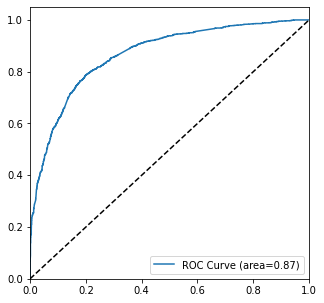

In [110]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_prob)

In [111]:
# checking the sensitivity and specificity tradeoff to find the optimal cutoff point ?

In [112]:
numbers = [float(x)/10 for x in range(10) ]

In [113]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [114]:
for i in numbers:
  y_train_pred_final[i] = y_train_pred_final.Conversion_prob.map(lambda x : 1 if x>i else 0)


In [115]:
y_train_pred_final.head()

,Converted,Conversion_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
9192,1,0.118909,0,1,1,0,0,0,0,0,0,0,0
3516,0,0.417171,0,1,1,1,1,1,0,0,0,0,0
1888,0,0.232129,0,1,1,1,0,0,0,0,0,0,0
90,0,0.083669,0,1,0,0,0,0,0,0,0,0,0
1327,1,0.605393,1,1,1,1,1,1,1,1,0,0,0


In [116]:
cutoff_df = pd.DataFrame(columns=["prob", "accuracy", "sensi", "speci"])

In [117]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [123]:
for i in numbers:
  cm1=metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i])
  total1 = sum(sum(cm1))
  accuracy = (cm1[0,0] + cm1[1,1]) / total1
  specificity = (cm1[0,0])/(cm1[0,0]+cm1[0,1])
  sensitivity = (cm1[1,1])/(cm1[1,1]+cm1[1,0])
  cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]


In [124]:
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.480834,1.000000,0.000000
0.1,0.1,0.57857,0.985082,0.202073
0.2,0.2,0.708361,0.938928,0.494819
0.3,0.3,0.756781,0.898834,0.625216
0.4,0.4,0.786595,0.812121,0.762953
0.5,0.5,0.791527,0.747319,0.832470
0.6,0.6,0.769334,0.647086,0.882556
0.7,0.7,0.754764,0.578555,0.917962
0.8,0.8,0.709258,0.446620,0.952504
0.9,0.9,0.644923,0.276923,0.985751


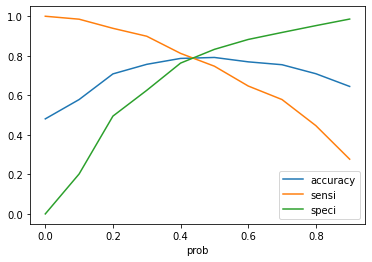

In [126]:
cutoff_df.plot.line(x="prob", y=["accuracy", "sensi", "speci"])
plt.show()

In [ ]:
# 0.4 probability is avarage scale for accuracy,sensi,speci. this is how we arrive at the select the threshold. so 0.4 is the threshold i'll used.